In [10]:
%matplotlib inline

In [11]:


import numpy as np
import pandas as pd

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

### 数据预处理

In [2]:
dataset =  pd.read_csv("iBeacon_RSSI_Unlabeled.csv").drop('location',axis=1)
dataset =  dataset.drop('date',axis=1)
dataset.head()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,-200,-200,-80,-200,-77,-56,-81,-200,-200,-200,-200,-200,-200
1,-200,-200,-80,-200,-78,-56,-200,-200,-200,-200,-200,-200,-200
2,-200,-200,-81,-200,-74,-63,-200,-200,-200,-200,-200,-200,-200
3,-200,-200,-200,-200,-75,-56,-200,-200,-200,-200,-200,-200,-200
4,-200,-200,-200,-200,-82,-56,-200,-200,-200,-200,-200,-200,-200


In [3]:
#将所有的数字+200保持它们都为正值
dataset1 = dataset
dataset2 = pd.DataFrame([[],[]])
col=[column for column in dataset1]
for i in col:
    for f in range(len(dataset1.b3012)):
        dataset1.loc[f,i]+=200
dataset1.head()

,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,0,0,120,0,123,144,119,0,0,0,0,0,0
1,0,0,120,0,122,144,0,0,0,0,0,0,0
2,0,0,119,0,126,137,0,0,0,0,0,0,0
3,0,0,0,0,125,144,0,0,0,0,0,0,0
4,0,0,0,0,118,144,0,0,0,0,0,0,0


In [4]:
# X = StandardScaler().fit_transform(dataset1)
# X
X = dataset1.values

In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test = train_test_split(dataset1,test_size=0.3)
X = X_train.values
X_test=X_test.values

D:\install2\anacdot\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## tsne 降维

In [56]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,init='pca', random_state=0)
Xd=tsne.fit_transform(dataset) #进行数据降维       
# tsne = pd.DataFrame(tsne.embedding_, index = dataset.index) #转换数据格式

### dbsan

In [99]:
# Compute DBSCAN
db = DBSCAN(eps=4, min_samples=8).fit(X)
Z = db.fit_predict(Xd)
#plt.scatter(X_test[:, 0], X_test[:, 1], c=Z, s=50, cmap='viridis')
print(Z.shape)
db.components_

(5191,)


array([[ 81.455025,  92.05264 ],
       [ 91.820015,  59.867092],
       [ 90.88775 ,  58.822727],
       ...,
       [-45.613686, -22.832745],
       [-46.53115 , -22.409744],
       [-45.613686, -22.832745]], dtype=float32)

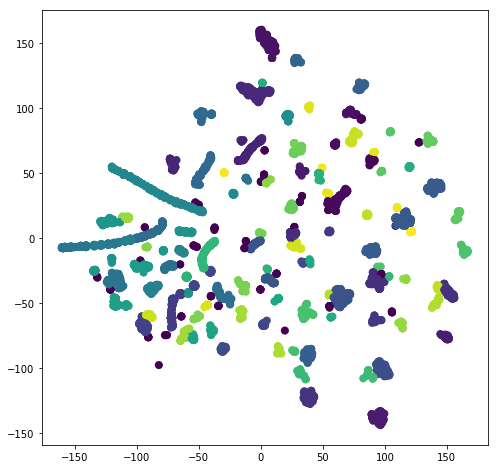

In [58]:
fig = plt.figure(figsize=(8, 8))
plt.scatter(Xd[:, 0], Xd[:, 1], c=Z, s=50, cmap='viridis')


In [73]:
labels = db.labels_
metrics.silhouette_score(X, labels, metric='euclidean')

0.6176193610989621

# K-Means

In [91]:
print(__doc__)

# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


Automatically created module for IPython interactive environment


In [117]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.fit_predict(Xd)

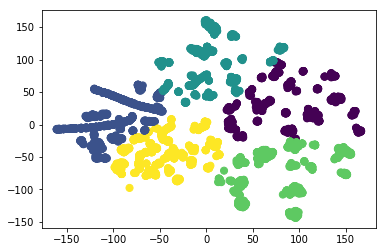

In [118]:
plt.scatter(Xd[:, 0], Xd[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [119]:

metrics.silhouette_score(Xd, labels, metric='euclidean')
                                                     

0.34196985

# 层次聚类


In [ ]:
from sklearn.cluster import AgglomerativeClustering
Hier = AgglomerativeClustering(n_clusters=4 ).fit(X)
ZHier = Hier.fit_predict(Xd)
plt.scatter(Xd[:, 0], Xd[:, 1], c=ZHier, s=50, cmap='viridis')

In [ ]:
labels = Hier.labels_
metrics.silhouette_score(X, labels, metric='euclidean')


###  GMM

D:\install2\anacdot\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
D:\install2\anacdot\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
D:\install2\anacdot\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
D:\install2\anacdot\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivaria

D:\install2\anacdot\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
D:\install2\anacdot\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
D:\install2\anacdot\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
D:\install2\anacdot\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_norm

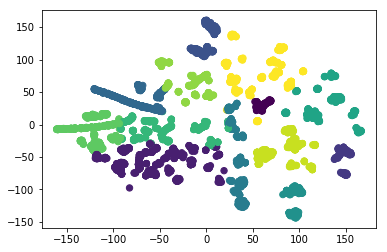

In [122]:
from sklearn.mixture import GMM
gmm = GMM(n_components=13,random_state=42).fit(X)
labels = gmm.fit_predict(Xd)
plt.scatter(Xd[:, 0], Xd[:, 1], c=labels, s=40, cmap='viridis');

In [123]:
gmm.score(Xd)

D:\install2\anacdot\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


array([-11.52552879, -11.61939213, -11.61168936, ..., -10.45005234,
       -10.44164206, -10.45005234])